In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import xgboost as xgb

Load Data Set

In [ ]:
df = pd.read_csv("/content/engine_failure_dataset.csv")

In [ ]:
df.drop(columns=["Time_Stamp", "Operational_Mode"], inplace=True)
df.dropna(inplace=True)

In [ ]:
X = df.drop(columns=["Fault_Condition"])
y = df["Fault_Condition"]

Encode categorical target labels to integers

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 Random Forest (Bagging)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)


XGBoost (Boosting)

In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)
xgb_proba = xgb_clf.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation Function

In [ ]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))

    if y_proba.shape[1] == 2:
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    else:
        roc_auc = roc_auc_score(y_true, y_proba, multi_class='ovr')

    print("ROC AUC:", roc_auc)
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("XGBoost", y_test, xgb_preds, xgb_proba)


 Model: Random Forest
Accuracy: 0.26
ROC AUC: 0.5016275500676612
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.44      0.25        32
           1       0.30      0.29      0.30        58
           2       0.31      0.16      0.21        62
           3       0.34      0.23      0.28        48

    accuracy                           0.26       200
   macro avg       0.28      0.28      0.26       200
weighted avg       0.29      0.26      0.26       200

Confusion Matrix:
 [[14  9  7  2]
 [20 17 10 11]
 [26 18 10  8]
 [19 13  5 11]]

 Model: XGBoost
Accuracy: 0.205
ROC AUC: 0.48466363291232134
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.28      0.18        32
           1       0.29      0.24      0.26        58
           2       0.19      0.15      0.16        62
           3       0.24      0.19      0.21        48

    accuracy                         

 Evaluate both models

In [ ]:
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("XGBoost", y_test, xgb_preds, xgb_proba)


 Model: Random Forest
Accuracy: 0.26
ROC AUC: 0.5016275500676612
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.44      0.25        32
           1       0.30      0.29      0.30        58
           2       0.31      0.16      0.21        62
           3       0.34      0.23      0.28        48

    accuracy                           0.26       200
   macro avg       0.28      0.28      0.26       200
weighted avg       0.29      0.26      0.26       200

Confusion Matrix:
 [[14  9  7  2]
 [20 17 10 11]
 [26 18 10  8]
 [19 13  5 11]]

 Model: XGBoost
Accuracy: 0.205
ROC AUC: 0.48466363291232134
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.28      0.18        32
           1       0.29      0.24      0.26        58
           2       0.19      0.15      0.16        62
           3       0.24      0.19      0.21        48

    accuracy                         

Feature Importance from XGBoost

<ipython-input-58-2458167651>:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

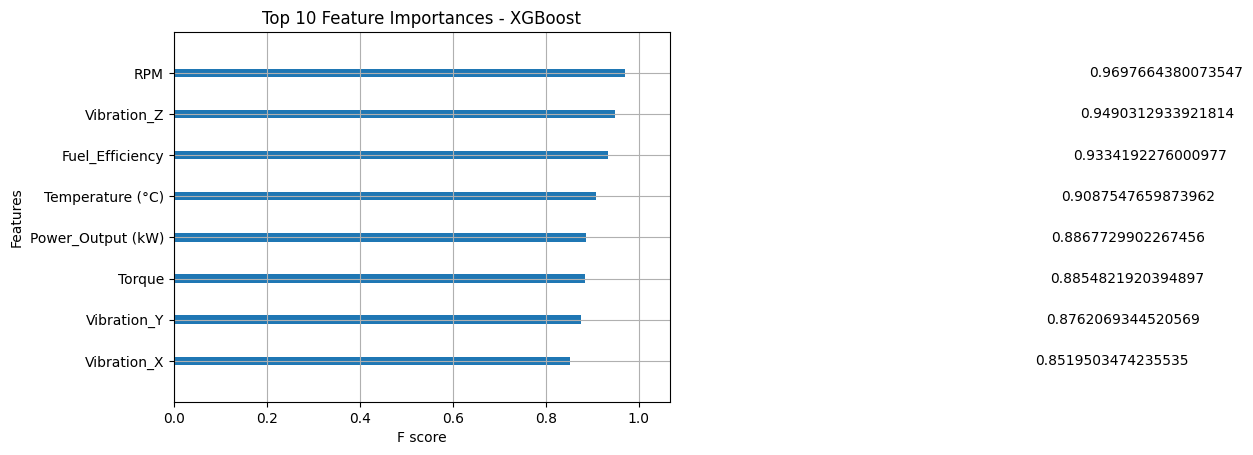

In [ ]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

Bagging vs Boosting Summary

🔹 Bagging (e.g., Random Forest):
   - Trains models in parallel on different random subsets
   - Reduces variance, less prone to overfitting
   - Combines results (majority vote or averaging)

🔹 Boosting (e.g., XGBoost):
   - Trains models sequentially, each correcting the previous
   - Reduces bias, focuses on hard-to-learn examples
   - Often better for structured/tabular data